# Extrasolar planets and their properties

This is an excerpt from a worksheet on extrasolar planets for second year undergraduate students. The concepts I aim to teach are:
* selection bias
* methods of detection of extrasolar planets
* data filtering
* simple plotting

---
### Question 1
Plot the planetary mass ($M_p \sin i$) vs orbital separation ($a$) on a log-log scale for the following cases: 
1. all extrasolar planets
2. highlight the <a href="https://en.wikipedia.org/wiki/Hot_Jupiter">Hot Jupiters</a> in this plot
2. planets detected by the radial velocity method
3. planets detected by the transit method


In [3]:
# Get the exoplanet data from the URL into the variable called 'all'
# This file has over 3000 lines, so this step can take a minute 
#    depending on your connection

all <- read.csv(url("http://exoplanet.eu/catalog/csv/"), header = TRUE)

# Let's start by listing the columns in this data file
colnames(all)



[1] "X..name"                    "planet_status"             
 [3] "mass"                       "mass_error_min"            
 [5] "mass_error_max"             "mass_sini"                 
 [7] "mass_sini_error_min"        "mass_sini_error_max"       
 [9] "radius"                     "radius_error_min"          
[11] "radius_error_max"           "orbital_period"            
[13] "orbital_period_error_min"   "orbital_period_error_max"  
[15] "semi_major_axis"            "semi_major_axis_error_min" 
[17] "semi_major_axis_error_max"  "eccentricity"              
[19] "eccentricity_error_min"     "eccentricity_error_max"    
[21] "inclination"                "inclination_error_min"     
[23] "inclination_error_max"      "angular_distance"          
[25] "discovered"                 "updated"                   
[27] "omega"                      "omega_error_min"           
[29] "omega_error_max"            "tperi"                     
[31] "tperi_error_min"            "tperi_error_max"           
[33] "tconj"                      "tconj_error_min"           
[35] "tconj_error_max"            "tzero_tr"                  
[37] "tzero_tr_error_min"         "tzero_tr_error_max"        
[39] "tzero_tr_sec"               "tzero_tr_sec_error_min"    
[41] "tzero_tr_sec_error_max"     "lambda_angle"              
[43] "lambda_angle_error_min"     "lambda_angle_error_max"    
[45] "impact_parameter"           "impact_parameter_error_min"
[47] "impact_parameter_error_max" "tzero_vr"                  
[49] "tzero_vr_error_min"         "tzero_vr_error_max"        
[51] "k"                          "k_error_min"               
[53] "k_error_max"                "temp_calculated"           
[55] "temp_calculated_error_min"  "temp_calculated_error_max" 
[57] "temp_measured"              "hot_point_lon"             
[59] "geometric_albedo"           "geometric_albedo_error_min"
[61] "geometric_albedo_error_max" "log_g"                     
[63] "publication_status"         "detection_type"            
[65] "mass_detection_type"        "radius_detection_type"     
[67] "alternate_names"            "molecules"                 
[69] "star_name"                  "ra"                        
[71] "dec"                        "mag_v"                     
[73] "mag_i"                      "mag_j"                     
[75] "mag_h"                      "mag_k"                     
[77] "star_distance"              "star_distance_error_min"   
[79] "star_distance_error_max"    "star_metallicity"          
[81] "star_metallicity_error_min" "star_metallicity_error_max"
[83] "star_mass"                  "star_mass_error_min"       
[85] "star_mass_error_max"        "star_radius"               
[87] "star_radius_error_min"      "star_radius_error_max"     
[89] "star_sp_type"               "star_age"                  
[91] "star_age_error_min"         "star_age_error_max"        
[93] "star_teff"                  "star_teff_error_min"       
[95] "star_teff_error_max"        "star_detected_disc"        
[97] "star_magnetic_field"        "star_alternate_names"

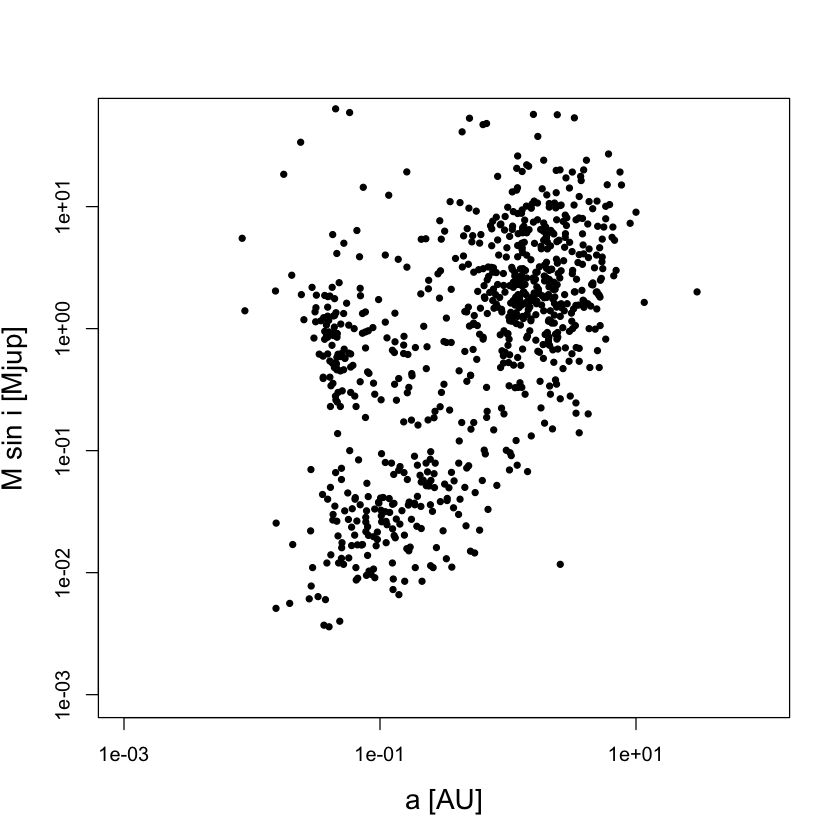

In [9]:
plot(all$semi_major_axis,all$mass_sini,xlab= "a [AU]", xlim = c(1e-3,100), ylim = c(1e-3, 50),
     pch = 20, ylab="M sin i [Mjup]", frame.plot = TRUE, cex.lab = 1.4, log = "xy", cex = 1.0)


The plot command is smart enough to remove the points that have missing data, but if we wanted to filter these out ahead of time, we could do:

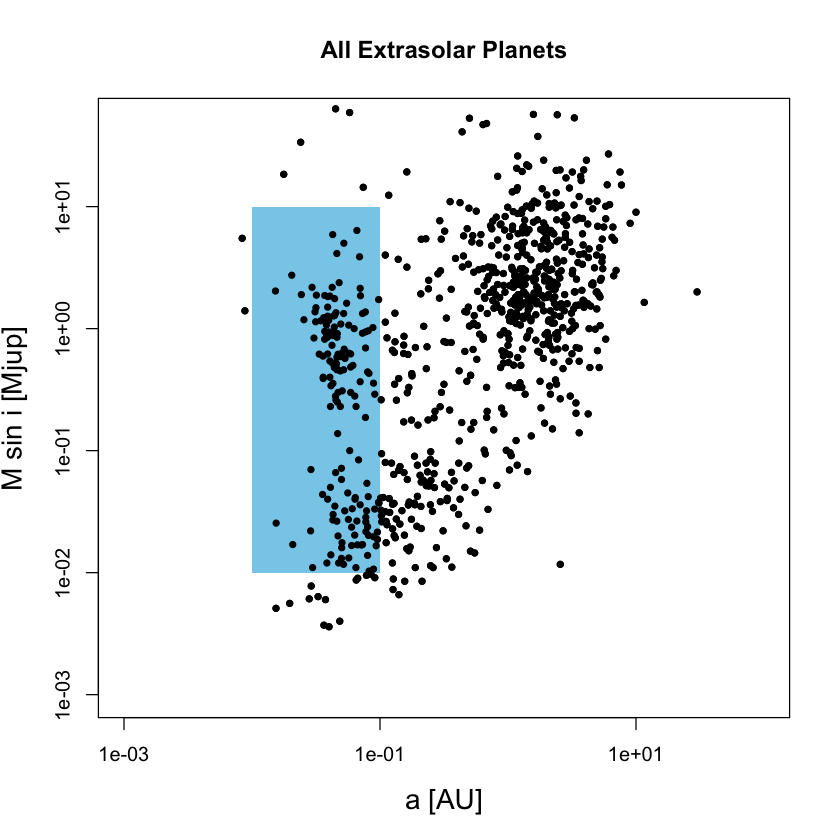

In [14]:
# Load dplyr, which makes sorting dataframes a breeze
library(dplyr)

# Keep only the two columns of interest, and filter out all the NAs
all %>%
select(mass_sini, semi_major_axis) %>%
na.omit() -> ma_array

# Now plot these filtered data 
plot(ma_array$semi_major_axis, ma_array$mass_sini, xlab= "a [AU]", xlim = c(1e-3,100), ylim = c(1e-3, 50),
     pch = 20, ylab="M sin i [Mjup]", frame.plot = TRUE, cex.lab = 1.4, log = "xy", cex = 1.0,
    main = "All Extrasolar Planets")

# Let's show where in the plot we'll find the Hot Jupiters by placing a partly transparent blue box over
rect(0.01, 0.01, 0.1,10, col = "skyblue", border = "transparent")

# The rectangle covers the data points, so let's plot them again, over the top
points(ma_array$semi_major_axis, ma_array$mass_sini, pch = 20)

The blue rectangle highlights the region of the plot we'll get the so-called "Hot Jupiters" -- Jupiter-like planets orbiting very near to their parent stars.

b) Now we want to filter for only those planets detected through the *radial velocity* method.

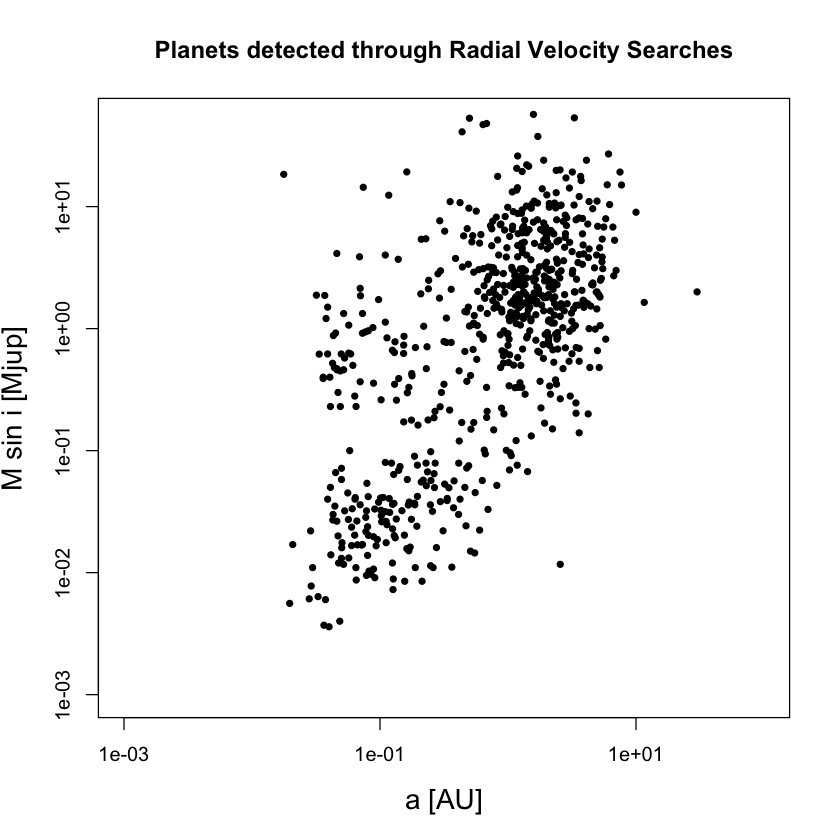

In [13]:
all %>%
filter (detection_type == "Radial Velocity") %>%
select(mass_sini, semi_major_axis) %>%
na.omit() -> radvels

# Now plot these filtered data 
plot(radvels$semi_major_axis, radvels$mass_sini, xlab= "a [AU]", xlim = c(1e-3,100), ylim = c(1e-3, 50),
     pch = 20, ylab="M sin i [Mjup]", frame.plot = TRUE, cex.lab = 1.4, log = "xy", cex = 1.0, 
     main = "Planets detected through Radial Velocity Searches")


c) Now we want to filter for only those planets detection through the *transit* method

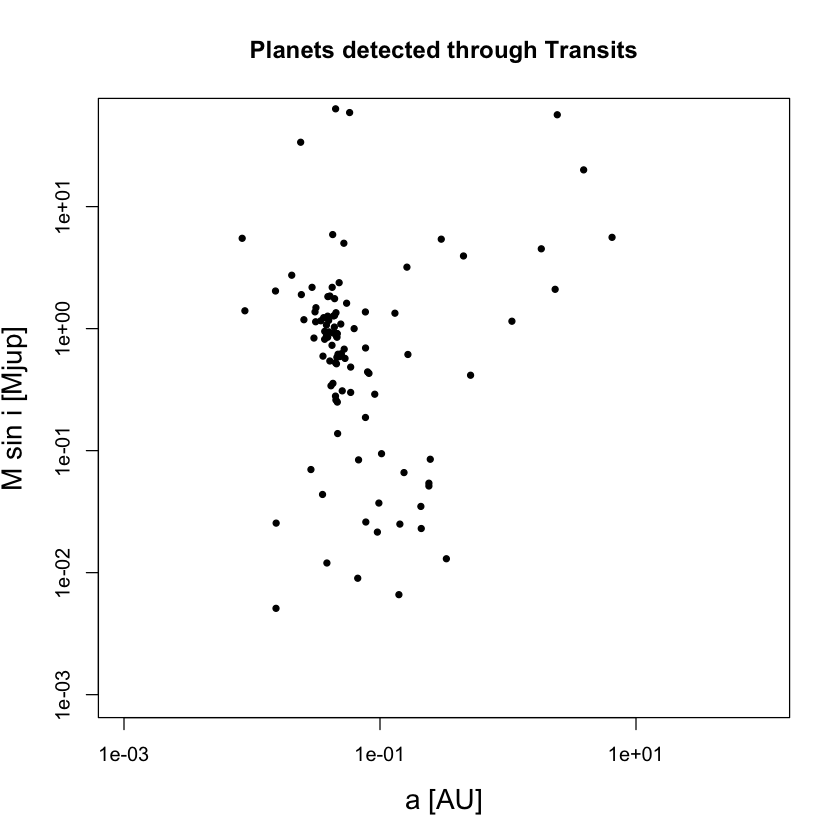

In [16]:
all %>%
filter (detection_type == "Primary Transit") %>%
select(mass_sini, semi_major_axis) %>%
na.omit() -> transits

# Now plot these filtered data 
plot(transits$semi_major_axis, transits$mass_sini, xlab= "a [AU]", xlim = c(1e-3,100), ylim = c(1e-3, 50),
     pch = 20, ylab="M sin i [Mjup]", frame.plot = TRUE, cex.lab = 1.4, log = "xy", cex = 1.0, 
     main = "Planets detected through Transits")


---
### Question 2
Looking at the plots above, do you think the Hot Jupiters are an observational bias (selection effect) or a real planetary population?


---
### Question 3

The High Accuracy Radial Velocity Planet Searcher (<a href="http://www.eso.org/sci/facilities/lasilla/instruments/harps.html">HARPS</a>) has found over one thousand exoplanets using the radial velocity search method. It has an accuracy of 1 m/s in radial velocity. 

How does this translate into limits on the masses and orbits of planets you can detect with HARPS orbiting a $1 M_\odot$ star?

---
From our lecture notes, we express Kepler's equation for the star-planet system as follows:
\begin{equation}
v_* \sin i = 28.4\left(\frac{P}{1\mathrm{yr}}\right)^{-1/3}\left(\frac{M_p\sin i}{M_J}\right)\left(\frac{M_*}{M_\odot}\right)^{-2/3}\mathrm{ms}^{-1}
\end{equation}
where $v_*$ is the velocity of the star, $P$ is the orbital period of the planet around the star (in years), $M_J$ is the mass of Jupiter, $M_*$ is the mass of the parent star in $M_\odot$. 

Using $M_* = 1 M_\odot$, and Kepler's harmonic law $P^2 = a^3$ (remember, this works in this specific choice of units), we can rewrite the equation above as:

\begin{equation}
\frac{M_p\sin i}{M_J} = \frac{v_*\sin i}{28.4\,\mathrm{m/s}}\left(\frac{a}{\mathrm{AU}}\right)^2
\end{equation}

With HARPS's accuracy of 1 m/s, we'd probably believe a planetary detection if it had a radial velocity greater than 3 m/s, so for this case we set $v_*\sin i$ = 3 m/s. We now plot this as the pink line on the graph below:

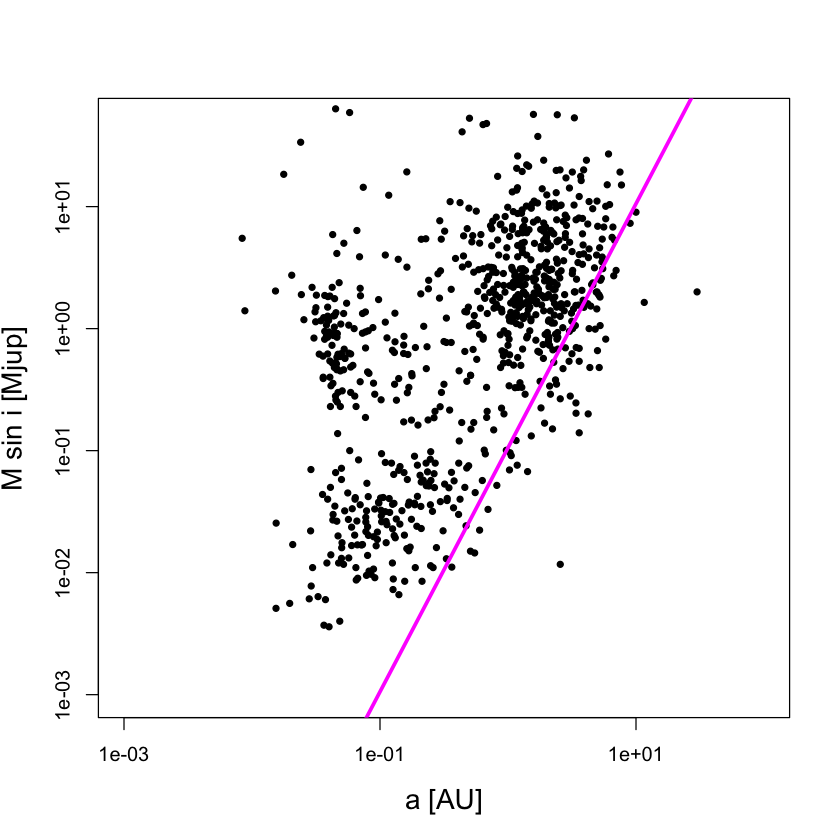

In [17]:
# Make the original plot
plot(ma_array$semi_major_axis, ma_array$mass_sini, xlab= "a [AU]", xlim = c(1e-3,100), ylim = c(1e-3, 50),
     pch = 20, ylab="M sin i [Mjup]", frame.plot = TRUE, cex.lab = 1.4, log = "xy", cex = 1.0)

# Now overplot the line in the equation above
curve(3/28.4 * x^2, add=TRUE, col = "magenta", lwd = 3.0)

HARPS will be insensitive to planets orbiting at distances to the right of the pink line and to planets with masses below the pink line.